# ECE174 MiniProject 1
## Problem 2: Kmeans Clustering
## Kwok Hung Ho A15151703



In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import random
from matplotlib import gridspec
import heapq
X = loadmat("mnist.mat")
data_train = X['trainX'] # Training set digits 
data_label = X['trainY'] # Training set labels
data_test = X['testX'] # Training set digits 
data_test_label = X['testY'] # Training set labels
inv   = np.linalg.inv
pinv  = np.linalg.pinv
solve = np.linalg.solve
rank  = np.linalg.matrix_rank
norm  = np.linalg.norm
det   = np.linalg.det
solve = np.linalg.solve
#ew_column1 = np.ones(60000)
#ata_train = np.insert(data_train, -1, new_column1, axis=1)
#ew_column2 = np.ones(10000)
#ata_test = np.insert(data_test, -1, new_column2, axis=1)

## Functions are declared below:
Paticularly, grouprep stores the centroids while newcluster assigns new datapoints to the cluster. These 2 functions are looped and count as 1 iteration in main. 

In [194]:
def euclideandist(x1, x2):
    #is this jclust?
    #divide by N (60,000)?
    return np.sqrt(np.sum((x1-x2)**2))

def kmeansinit(Nvectors, Kclusters):
    C = []
    for i in range(len(Nvectors)):
        ran = random.randint(1, Kclusters)
        C.append(ran)
    C = np.array(C)
    return C

def grouprep(data, C, K):
    Z = np.array([])
    for i in range(K):  
        group = []
        for j in range(len(data)):
            if C[j] == i+1:
                group.append(data[j,:])
        group=np.array(group)
        centroid = np.mean(group, axis=0)
        Z = np.append(Z, centroid)
    Z = Z.reshape(K,784)
    return Z

def newcluster(data, Z, oldcluster, clusters):
    C = []
    jclust=[]
    distances = [] 
    for j in range(len(data)):
        distances = []
        for i in range(clusters):
            distances.append(euclideandist(data[j], Z[i]))
            if oldcluster[j]==i+1:
                jclust.append(euclideandist(data[j]/255,Z[i]/255)**2) #normalized
        minindex = np.argmin(distances)+1
        C.append(minindex)
    C = np.array(C)
    jclust = sum(jclust)/len(data)
    return C, jclust


#loop this P times        
def main(data, K):
    initialC = kmeansinit(data, K)
    updatecentroid = grouprep(data, initialC, K)
    updatecluster, jclust = newcluster(data, updatecentroid, initialC, K)
    jclust=0
    jclustaxis=[]
    iterationaxis = []
    previousjclust=0
    for iterations in range(15):
        #print("iteration "+str(iterations) +": "+"jclust:" + str(jclust))
        updatecluster,jclust = newcluster(data, updatecentroid, updatecluster, K)
        updatecentroid = grouprep(data, updatecluster, K)
        print("iteration "+str(iterations) +": "+"jclust:" + str(jclust))
        jclustaxis.append(jclust)
        iterationaxis.append(iterations)
        
        if iterations > 0:
            previousjclust = jclustaxis[iterations - 1]
    
        if abs(jclust - previousjclust) < 0.1: #jclust convergence variable
            #print(jclust)
            #print(previousjclust)
            #print("break")
            break
        #print("")
    
    #plotting jclust
    jclustaxis = np.array(jclustaxis)
    iterationaxis = np.array(iterationaxis)
    #fig,ax = plt.subplots(1)
    #ax.plot(iterationaxis,jclustaxis)
    finalcentroid = updatecentroid
    finalcluster = updatecluster
    return finalcentroid, finalcluster, jclust, jclustaxis, iterationaxis

def plotjclust(jclustaxis, iterationaxis):
    fig,ax = plt.subplots(1)
    ax.plot(iterationaxis,jclustaxis)
    return

### Running main function 30 times (P=30, K=20)
Below, we run main 30 times and save the outputs of the jclust changes each iteration, final jclust and final centroids each time. This allows us to find the argument of the maximum and minimum values for the final jclust in the paticular list and find the corresponding axes for plotting that specific "P" run. It also saves the final centroids aka group representatives so that we can reshape them into images later for inspection and evaluation of performance. 

In [220]:
#Running Main 30 times (P=30, K=20)
finaljclust = []
jclustaxes = []
iterationaxes = []
finalcentroids = []
for P in range(30):
    print("P = " +str(P+1)+" :")
    finalcentroid, finalcluster, jclust, jclustaxis, iterationaxis= main(data_test, 20)
    finaljclust.append(jclust)
    jclustaxes.append(jclustaxis)
    iterationaxes.append(iterationaxis)
    finalcentroids.append(finalcentroid)

P = 1 :
iteration 0: jclust:51.417169987275564
iteration 1: jclust:41.792206239000826
iteration 2: jclust:37.73502875213554
iteration 3: jclust:36.50680774850369
iteration 4: jclust:35.928003166835985
iteration 5: jclust:35.527540020281386
iteration 6: jclust:35.2566509577559
iteration 7: jclust:35.10879296650794
iteration 8: jclust:35.03044768200095
P = 2 :
iteration 0: jclust:51.28625193439701
iteration 1: jclust:41.770989198188495
iteration 2: jclust:38.23498052297923
iteration 3: jclust:37.009187478016486
iteration 4: jclust:36.209891625499786
iteration 5: jclust:35.78297088059865
iteration 6: jclust:35.583088445539
iteration 7: jclust:35.45922793196302
iteration 8: jclust:35.379443460710775
P = 3 :
iteration 0: jclust:51.37875904225627
iteration 1: jclust:42.135337943304805
iteration 2: jclust:38.098891812539314
iteration 3: jclust:36.610441861976064
iteration 4: jclust:35.960277772754026
iteration 5: jclust:35.6669805898162
iteration 6: jclust:35.497603699882376
iteration 7: jclu

### Results of P=30, K=20:
As computed from above, below, for the maximum and minimum JClust runs which are P=7 and P=12 respectively, corresponding to the index6 and index11 respectively, has jclust values 35.612 and 34.95 respectively. The plots are as shown respectively. The top plot corresponds to the max run and the bottom plot corresponds to the min run. The X axis for both is the Jclust value and the Y axis is the iteration. The plots move from right to left over time. The Jclust values are also normalized to 1 order of magnitude because in newcluster, where I compute it, I normalized the data and the group representatives to be between 0 and 1.

6
11


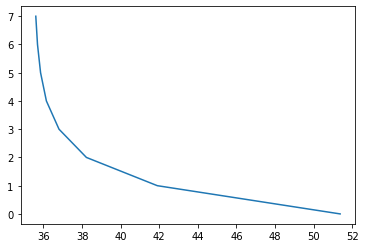

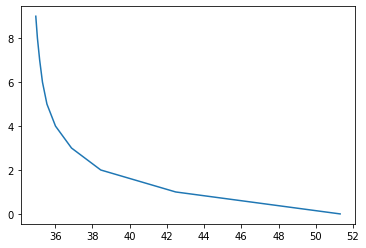

In [221]:
# Retrieving Maxima and Minima
npfinaljclust=np.array(finaljclust)

maxjclust = max(finaljclust)
maxindex=np.argmax(npfinaljclust)
plotjclust(iterationaxes[maxindex],jclustaxes[maxindex])##
maxcentroid = finalcentroids[maxindex]

minjclust =min(finaljclust)
minindex=np.argmin(npfinaljclust)
plotjclust(iterationaxes[minindex],jclustaxes[minindex])##
mincentroid = finalcentroids[minindex]

print(maxindex)
print(minindex)

Below are the final group representatives for the max and min runs after their final iteration. Converging with a Jclust of about 35, the pictures below resemble definite handwritten numbers with the exception of a few. The top 20 images are the 20 K group representatives aka centroids for the maximum jclust returned out of 30 runs. The bottom 20 images are the 20 K group representatives aka centroids for the maximum jclust returned out of 30 runs. 

### Group representatives plotted:

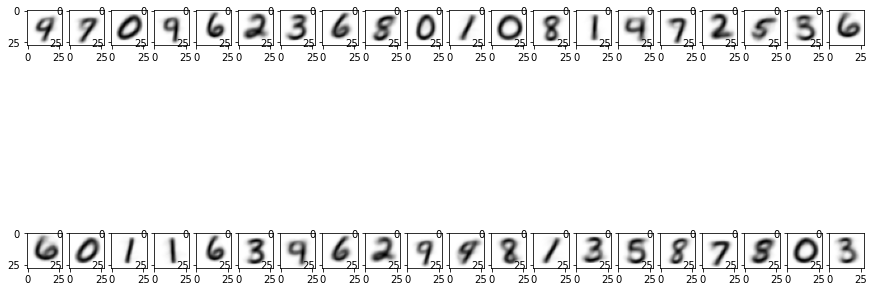

In [222]:
#Visualize K group representatives as images (centroids)
K=20
maxcentroid = finalcentroids[maxindex]
mincentroid = finalcentroids[minindex]
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(K):
    fig.add_subplot(1,20, 1+i)
    plt.imshow(maxcentroid[i].reshape(28,28),cmap='binary')
    fig.add_subplot(2,20, 1+i)
    plt.imshow(mincentroid[i].reshape(28,28),cmap='binary')

### Discussion of Results:
The majority of the pictures are distinguishable, the exceptions include 9 and 4 being similar, and 5 and 8 being similar. Though not as clear as the training data, these points are averages from the clusters, having similar features being grouped. The result is not bad and the algorithm succeeds.

### Finding closest 10 data points:
Below is the code that creates the numpy array npmin10, which stores the distances of every data point to every centroid.

In [223]:
K = 20
min10 = []
finalmin10=[]
for i in range(len(data_test)):
    distances = []
    for j in range(K):
        distances.append(euclideandist(data_test[i],mincentroid[j]))
    min10.append(distances)#10,000 nparrays of20
npmin10 = np.array(min10)

min10 = []
finalmin10=[]
for i in range(len(data_test)):
    distances = []
    for j in range(K):
        distances.append(euclideandist(data_test[i],maxcentroid[j]))
    min10.append(distances)#10,000 nparrays of20
npmax10 = np.array(min10)

## Plotting the images, eyeballing digits (P=30, K=20)
Using argsort on the negation of npmin10, I return the indices of the 10 smallest distances for each cluster. (Since argsort returns the max value I had to negate the matrix). I then plot the corresponding datapoints in a 20X10 figure. Each row indicates the Kth cluster and should have similar features via Kmeans algorithm.

[8879 5362 1111 1183 1745 6318 7833 6974 2615 6520]
[6306 5110 7124 5107 7544 7238 8825 7059 1848 5077]
[5124 8978 5069 7601 8343 6766 8137 8764 5139 8772]
[1165 8623 3041 1668 2443 2792 2692  773 7322  481]
[5276 9312 2458 3395 6252 6933 2759 1373 8779 5354]
[8746 4296 6193 2981 6217 2662 3142 7012  208 5723]
[9365 6982 8701 8070 5346 8876 8910 1205 5508 8811]
[9149 3382 8814 5378 2026 6707 7358 6639 6943 9148]
[9298  448 6442 7060 3224 1693 1041 5059 7274  129]
[5721 3959 1294 1739 3481 3310 1261  148 5592 7703]
[5461 6276 8432 3211 7091 9802 7165  202 5113 5316]
[4033 1708 8468 9230 1333 9459   71 8548 4611 7693]
[9420 3374 5875 5864 2856 9330 2549  621 3002 8618]
[4931 1350 3919 4774  342 3648  675 5524 1994  663]
[4192  843 1815 7621   49 9276 3684 1652 5202 3278]
[6586 2567 9806 2275 9288 9340 3993 1799 7650 6856]
[2092 2481 4456 1056 2157 2296  306 1927 4354 8069]
[8275 9675 9616 2241 5658 8982 6530 9671 9606 8232]
[1605 5606 6863 3312 3944 3917 1144 2083 4770 3715]
[8668 6301 5

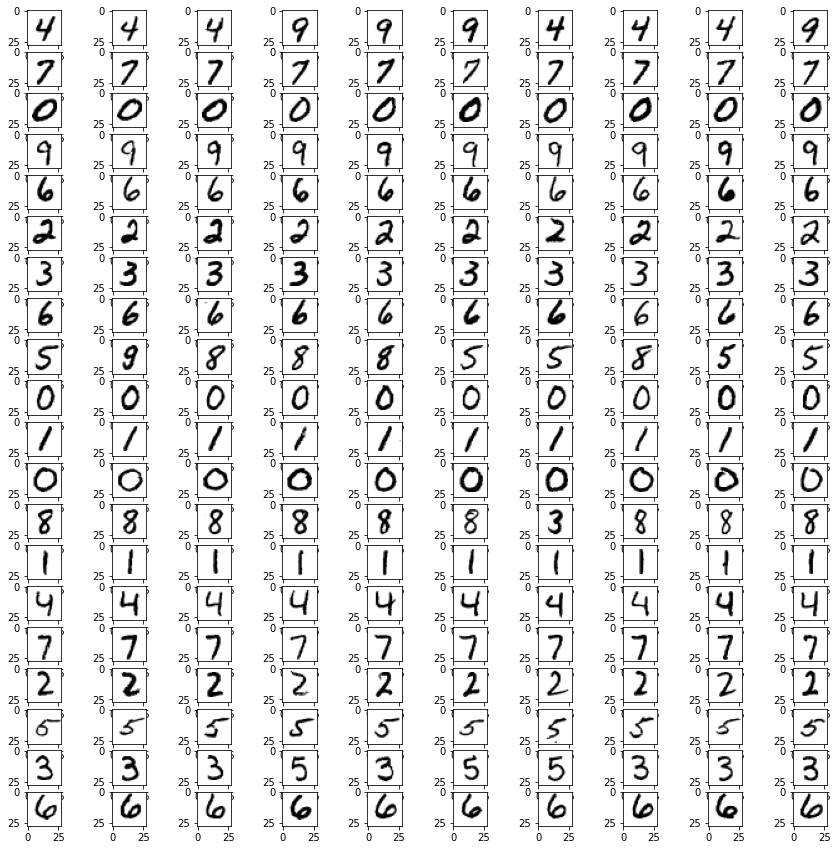

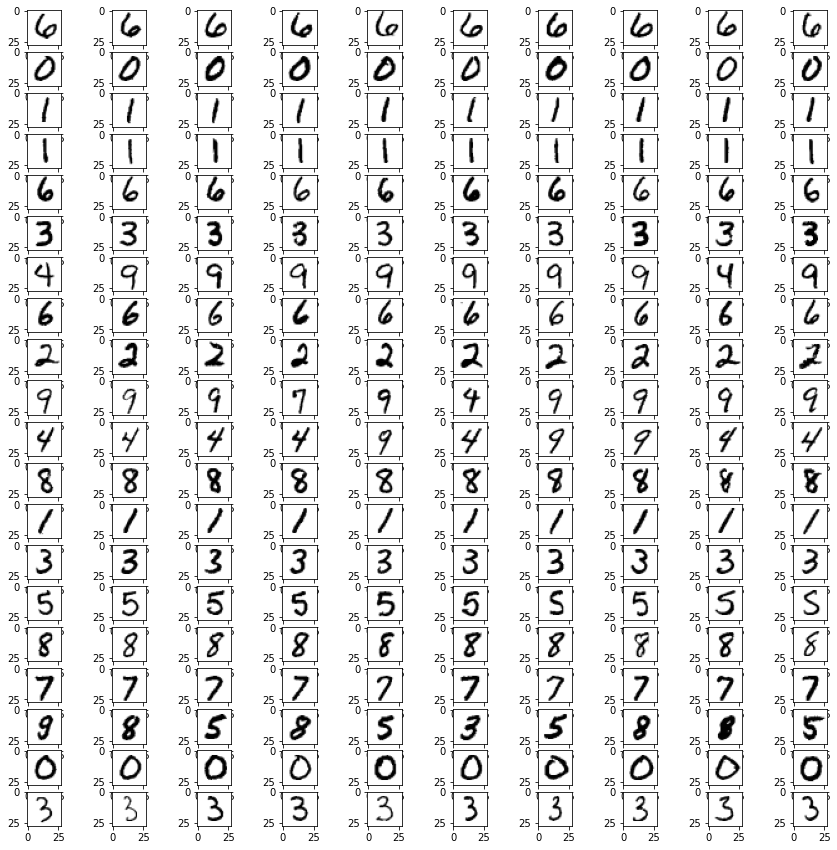

In [228]:
temp=[]
fig, axs = plt.subplots(20, 10, figsize=(15,15))
for i in range(20):
    a = (-npmin10[:,i]).argsort()[-10:][::-1]
    temp.append(a) #gives index of 10 closest pictures each cluster
    print(temp[i])
for i in range(20):
    for j in range(10):
         axs[i,j].imshow(data_test[temp[i][j],:].reshape(28,28),cmap='binary')

print("min-max")

temp=[]
fig, axs = plt.subplots(20, 10, figsize=(15,15))
for i in range(20):
    a = (-npmax10[:,i]).argsort()[-10:][::-1]
    temp.append(a) #gives index of 10 closest pictures each cluster
    print(temp[i])
for i in range(20):
    for j in range(10):
         axs[i,j].imshow(data_test[temp[i][j],:].reshape(28,28),cmap='binary')

## Generating a table:
Through eyeballing the data and comparing to the second row corresponding the minium run centroids from above. I have generated a 2X20 table below to indicate the correctly and incorectly classified closest 10 data points. The Top row signifies the correct amount of classifications and the bottom signifies the amount of wrongly classified. We can see that the worst performing group was group index7, index11 and index13 with 4 wrong classifications in my opinion. This makes sense as the corresponding centroids as seen fomr above are the most blurry group representatives.

In [231]:
min_correct_table = np.zeros(20)
min_correct_table[0] = 6
min_correct_table[1] = 10
min_correct_table[2] = 10
min_correct_table[3] = 10
min_correct_table[4] = 10
min_correct_table[5] = 10
min_correct_table[6] = 10
min_correct_table[7] = 10
min_correct_table[8] = 5
min_correct_table[9] = 10
min_correct_table[10] = 10
min_correct_table[11] = 10
min_correct_table[12] = 9
min_correct_table[13] = 10
min_correct_table[14] = 10
min_correct_table[15] = 10
min_correct_table[16] = 10
min_correct_table[17] = 10
min_correct_table[18] = 7
min_correct_table[19] = 10
min_misclassified_table = 10 - min_correct_table
print("min:")
min_correct_table = min_correct_table.astype(int)
min_misclassified_table=min_misclassified_table.astype(int)
print(min_correct_table)
print(min_misclassified_table)
max_correct_table = np.zeros(20)
max_correct_table[0] = 10
max_correct_table[1] = 10
max_correct_table[2] = 10
max_correct_table[3] = 10
max_correct_table[4] = 10
max_correct_table[5] = 10
max_correct_table[6] = 9
max_correct_table[7] = 10
max_correct_table[8] = 10
max_correct_table[9] = 8
max_correct_table[10] = 7
max_correct_table[11] = 10
max_correct_table[12] = 10
max_correct_table[13] = 10
max_correct_table[14] = 10
max_correct_table[15] = 10
max_correct_table[16] = 10
max_correct_table[17] = 4
max_correct_table[18] = 10
max_correct_table[19] = 10
max_misclassified_table = 10 - max_correct_table
print("max:")
max_correct_table = max_correct_table.astype(int)
max_misclassified_table=max_misclassified_table.astype(int)
print(max_correct_table)
print(max_misclassified_table)

min:
[ 6 10 10 10 10 10 10 10  5 10 10 10  9 10 10 10 10 10  7 10]
[4 0 0 0 0 0 0 0 5 0 0 0 1 0 0 0 0 0 3 0]
max:
[10 10 10 10 10 10  9 10 10  8  7 10 10 10 10 10 10  4 10 10]
[0 0 0 0 0 0 1 0 0 2 3 0 0 0 0 0 0 6 0 0]


# Repeating for K =10 and P =20

In [195]:
#Running Main 30 times (P=20, K=10)
finaljclust = []
jclustaxes = []
iterationaxes = []
finalcentroids = []
for P in range(20):
    print("P = " +str(P+1)+" :")
    finalcentroid, finalcluster, jclust, jclustaxis, iterationaxis= main(data_test, 10)
    finaljclust.append(jclust)
    jclustaxes.append(jclustaxis)
    iterationaxes.append(iterationaxis)
    finalcentroids.append(finalcentroid)

P = 1 :
iteration 0: jclust:52.080202893565
iteration 1: jclust:45.17110507194459
iteration 2: jclust:41.89492615874467
iteration 3: jclust:41.02120712069119
iteration 4: jclust:40.64055445483258
iteration 5: jclust:40.37949209427002
iteration 6: jclust:40.153543061948035
iteration 7: jclust:39.926822576441026
iteration 8: jclust:39.72897616704789
iteration 9: jclust:39.52686884391933
iteration 10: jclust:39.333116548623124
iteration 11: jclust:39.17996877617728
iteration 12: jclust:39.08084161573949
P = 2 :
iteration 0: jclust:51.95517767051623
iteration 1: jclust:44.17513137957651
iteration 2: jclust:40.99422567074636
iteration 3: jclust:39.80438990157642
iteration 4: jclust:39.39086765574237
iteration 5: jclust:39.241885021621506
iteration 6: jclust:39.167472586838315
P = 3 :
iteration 0: jclust:51.9460702217003
iteration 1: jclust:45.35276871791553
iteration 2: jclust:41.70945255796379
iteration 3: jclust:40.552161627443155
iteration 4: jclust:39.901258390863994
iteration 5: jclust

## Results of P=20, K=10:
Max run with P = 14 has final jclust of 39.45 and min run witj P = 5 has final jclust of 39.07. The index thus is respectively 13 and 4 as printed below. The plots are also shown for the max and min respectively from top to bottom. 


13
4


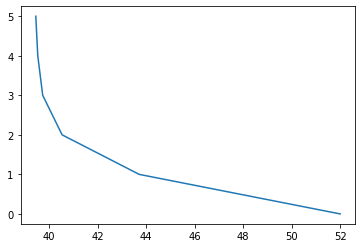

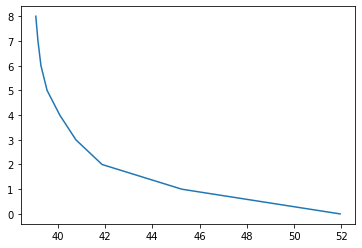

In [196]:
# Retrieving Maxima and Minima
npfinaljclust=np.array(finaljclust)

maxjclust = max(finaljclust)
maxindex=np.argmax(npfinaljclust)
plotjclust(iterationaxes[maxindex],jclustaxes[maxindex])##
maxcentroid = finalcentroids[maxindex]

minjclust =min(finaljclust)
minindex=np.argmin(npfinaljclust)
plotjclust(iterationaxes[minindex],jclustaxes[minindex])##
mincentroid = finalcentroids[minindex]

print(maxindex)
print(minindex)

Below are the final group representatives for the max and min jclust runs respectively. The top row is max and bottom row is min. 

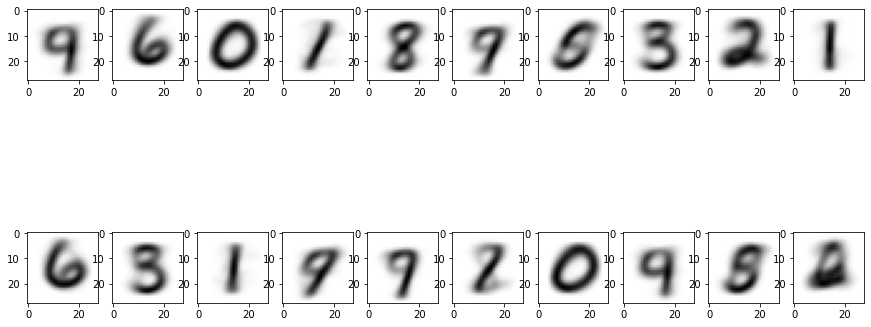

In [197]:
K=10
maxcentroid = finalcentroids[maxindex]
mincentroid = finalcentroids[minindex]
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(K):
    fig.add_subplot(1,10, 1+i)
    plt.imshow(maxcentroid[i].reshape(28,28),cmap='binary')
    fig.add_subplot(2,10, 1+i)
    plt.imshow(mincentroid[i].reshape(28,28),cmap='binary')

## Discussion of Results:
The majority of the centroids are quite distinguishable. With only 1 or 2 groups being blurry. This can have an affect on the classification accuracy later.

### Finding closest 10 data points:
Below is the code that creates the numpy array npmin10, which stores the distances of every data point to every centroid.

In [200]:
K = 10
min10 = []
for i in range(len(data_test)):
    distances = []
    for j in range(K):
        distances.append(euclideandist(data_test[i],maxcentroid[j]))
    min10.append(distances)#10,000 nparrays of20
npmax10 = np.array(min10)

min10 = []
for o in range(len(data_test)):
    distances = []
    for f in range(K):
        distances.append(euclideandist(data_test[o],mincentroid[f]))
    min10.append(distances)#10,000 nparrays of20
npmin10 = np.array(min10)

## Plotting the images, eyeballing digits (P=20, K=10)
Using argsort on the negation of npmin10 and npmax10, I return the indices of the 10 smallest distances for each cluster. (Since argsort returns the max value I had to negate the matrix). I then plot the corresponding datapoints in a 10X10 figure for both max and min jclust runs. Each row indicates the Kth cluster and should have similar features via Kmeans algorithm.

[8623 1309  105 1165 3485  496 7669  773 3592 2983]
[6933 2458 5276 1373 3362 6261 9312 8779 8831 2759]
[4542 5659 4631 1723 8127 1333  592 7289 6201 8671]
[3211 9845 5461  202 6276 9802 6456 7091 6678 8159]
[9420 6275 3588 8585 3374 7313 5489 6612 1719 8618]
[5429 6267 5533 5414 6586 5363 9864 9638 9362 1745]
[2986 8940 6483 7351 3814 5480 8987 7352 3218  993]
[4770 2083 1605 4537  310 2634 1531 6863 6365 2303]
[ 208 3142 6193 7281 4296 6534 3661 4189 6217 3223]
[4931 3919 4774 5524 1994 1350 2541  675  663  342]
[5230 5884  138 6350  463 6824 9373 6354 6218 7078]
[4770 1605 3715 2076 2083 4537  310 5606  855 6863]
[4931 9291 3648 1350  675 2164 1238 1994 1867 1876]
[5247 5101 8917 6656 8202 9785 7238 7243 9517 9659]
[6586 2567 1401 6856 2275 3098 1321 1925 9448 9340]
[4262 3211 6468 7165 7567 5025 9030 8159 9485 6502]
[4542 8127 6201 8671 7289 6293 8730 4631 5659 5305]
[3485  105 7669 1309  496 3282 9406 8623 2323 2983]
[ 448 7324 2586 7003 7351 2525 3952 9331 9428 1637]
[4296 9334 9

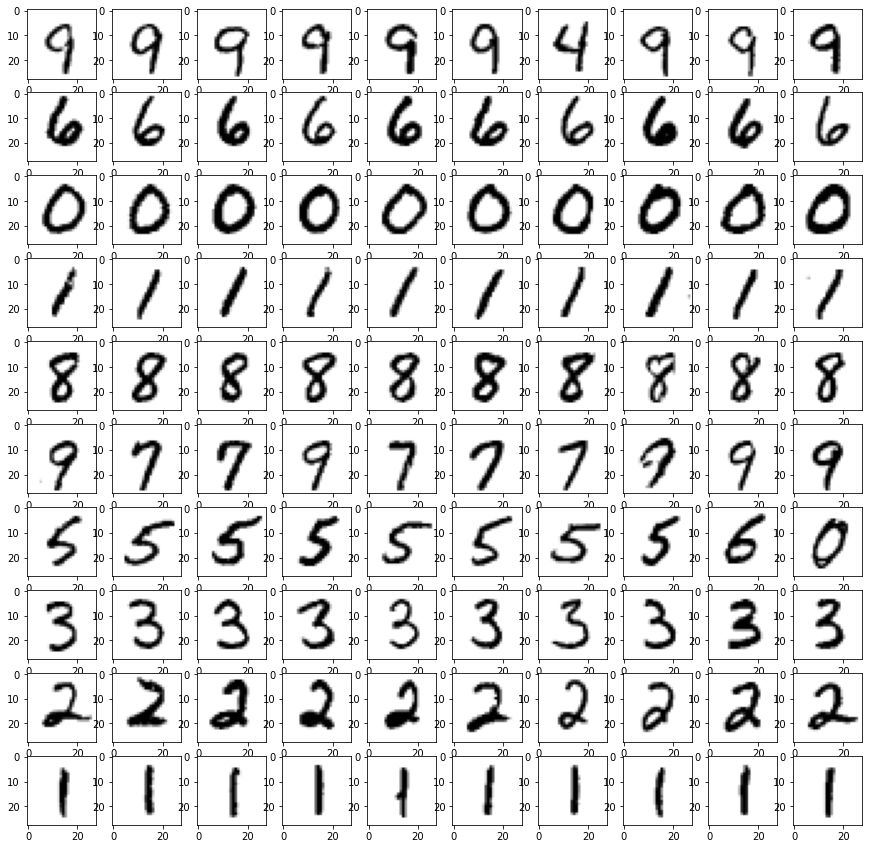

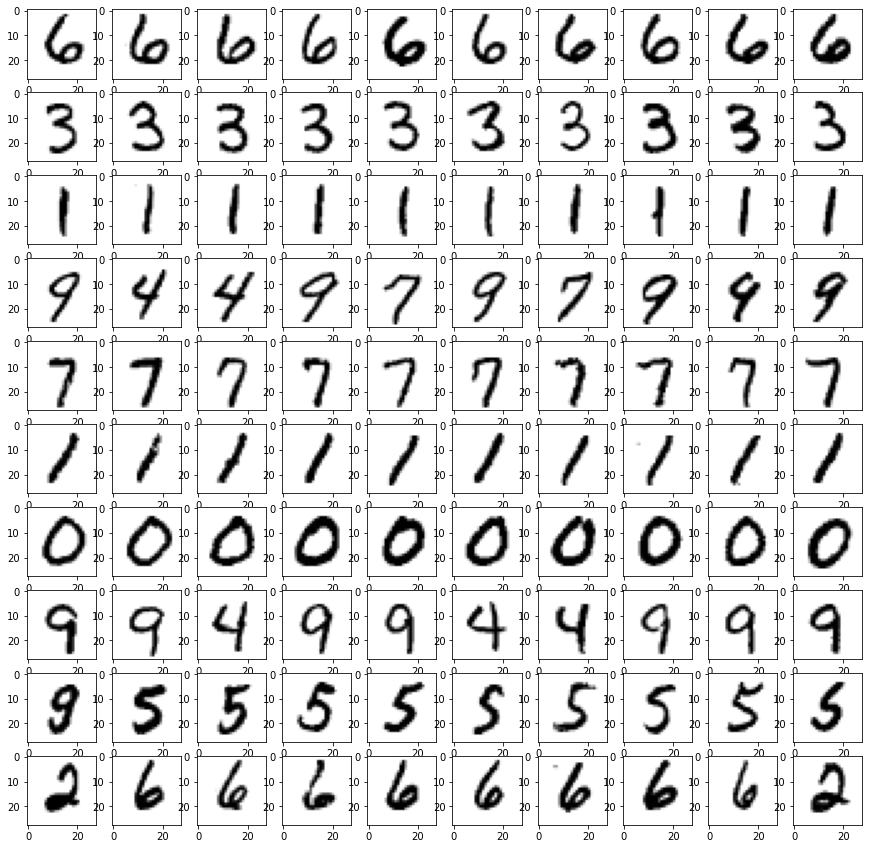

In [205]:
temp=[]
fig, axs = plt.subplots(10, 10, figsize=(15,15))
for i in range(10):
    a = (-npmin10[:,i]).argsort()[-10:][::-1]
    temp.append(a) #gives index of 10 closest pictures each cluster
    print(temp[i])
for i in range(10):
    for j in range(10):
         axs[i,j].imshow(data_test[temp[i][j],:].reshape(28,28),cmap='binary')
    #print(data_test_label)
    
temp=[]
fig, axs = plt.subplots(10, 10, figsize=(15,15))
for i in range(10):
    a = (-npmax10[:,i]).argsort()[-10:][::-1]
    temp.append(a) #gives index of 10 closest pictures each cluster
    print(temp[i])
for i in range(10):
    for j in range(10):
         axs[i,j].imshow(data_test[temp[i][j],:].reshape(28,28),cmap='binary')
    #print(data_test_label)

## Generating a table:
Through eyeballing the data and comparing to the 2 rows of centroids from above. I have generated a 2X10 table for e ach jclust max and min runs below. They indicate the correctly and incorectly classified closest 10 data points. For each table, the top row signifies the correct amount of classifications and the bottom signifies the amount of wrongly classified. We can see that the worst performing group was group index5 for min with 5 misclassifications and the worst group for max was group index3 with 4 misclassified. 

In [210]:
min_correct_table = np.zeros(10)
max_correct_table = np.zeros(10)
min_correct_table[0] = 9
min_correct_table[1] = 10
min_correct_table[2] = 10
min_correct_table[3] = 10
min_correct_table[4] = 10
min_correct_table[5] = 5
min_correct_table[6] = 8
min_correct_table[7] = 10
min_correct_table[8] = 10
min_correct_table[9] = 10
max_correct_table[0] = 10
max_correct_table[1] = 10
max_correct_table[2] = 10
max_correct_table[3] = 6
max_correct_table[4] = 10
max_correct_table[5] = 10
max_correct_table[6] = 10
max_correct_table[7] = 7
max_correct_table[8] = 9
max_correct_table[9] = 8

min_misclassified_table = 10 - min_correct_table
max_misclassified_table = 10 - max_correct_table
min_correct_table = min_correct_table.astype(int)
max_correct_table = max_correct_table.astype(int)
min_misclassified_table=min_misclassified_table.astype(int)
max_misclassified_table=max_misclassified_table.astype(int)
print("min:")
print(min_correct_table)
print(min_misclassified_table)
print("max:")
print(max_correct_table)
print(max_misclassified_table)

min:
[ 9 10 10 10 10  5  8 10 10 10]
[1 0 0 0 0 5 2 0 0 0]
max:
[10 10 10  6 10 10 10  7  9  8]
[0 0 0 4 0 0 0 3 1 2]


The tables above show for the jclust runs the amount of errors in classifications. The bottom row is the error and the top row is the correct classification. 

# Repeating for K =5 and P =10

In [212]:
#Running Main 10 times (P=10, K=15)
finaljclust = []
jclustaxes = []
iterationaxes = []
finalcentroids = []
for P in range(10):
    print("P = " +str(P+1)+" :")
    finalcentroid, finalcluster, jclust, jclustaxis, iterationaxis= main(data_test, 5)
    finaljclust.append(jclust)
    jclustaxes.append(jclustaxis)
    iterationaxes.append(iterationaxis)
    finalcentroids.append(finalcentroid)

P = 1 :
iteration 0: jclust:52.38178049177675
iteration 1: jclust:47.266768498206275
iteration 2: jclust:45.34965250685265
iteration 3: jclust:44.515781111936484
iteration 4: jclust:44.07985944083432
iteration 5: jclust:43.88792542953923
iteration 6: jclust:43.762049291340084
iteration 7: jclust:43.64944326165741
iteration 8: jclust:43.53583169695742
iteration 9: jclust:43.43433120808416
iteration 10: jclust:43.34668044884644
P = 2 :
iteration 0: jclust:52.336224428417104
iteration 1: jclust:47.9089195013115
iteration 2: jclust:46.48734488360789
iteration 3: jclust:45.47861722471101
iteration 4: jclust:44.877433228184664
iteration 5: jclust:44.50467185537248
iteration 6: jclust:44.134421662132084
iteration 7: jclust:43.89134248446654
iteration 8: jclust:43.81189231796681
P = 3 :
iteration 0: jclust:52.46171900075518
iteration 1: jclust:46.76701938016506
iteration 2: jclust:44.57742515369082
iteration 3: jclust:44.08668574802703
iteration 4: jclust:43.79651955319271
iteration 5: jclust:

### Results of P=10, K=5:
As computed from above, below, for the maximum and minimum JClust runs which are P=9 and P=10 respectively, corresponding to the 9th and 10th run respectively, has jclust values 44.09 and 43.43 respectively. The plots are as shown respectively. The top plot corresponds to the max run and the bottom plot corresponds to the min run. 

5
4


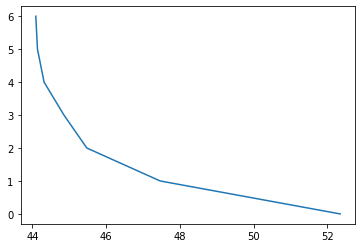

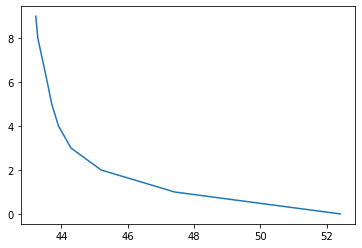

In [213]:
# Retrieving Maxima and Minima
npfinaljclust=np.array(finaljclust)

maxjclust = max(finaljclust)
maxindex=np.argmax(npfinaljclust)
plotjclust(iterationaxes[maxindex],jclustaxes[maxindex])##
maxcentroid = finalcentroids[maxindex]

minjclust =min(finaljclust)
minindex=np.argmin(npfinaljclust)
plotjclust(iterationaxes[minindex],jclustaxes[minindex])##
mincentroid = finalcentroids[minindex]

print(maxindex)
print(minindex)

Below are the final group representatives for the max and min jclust runs respectively. The top row is max and bottom row is min. 

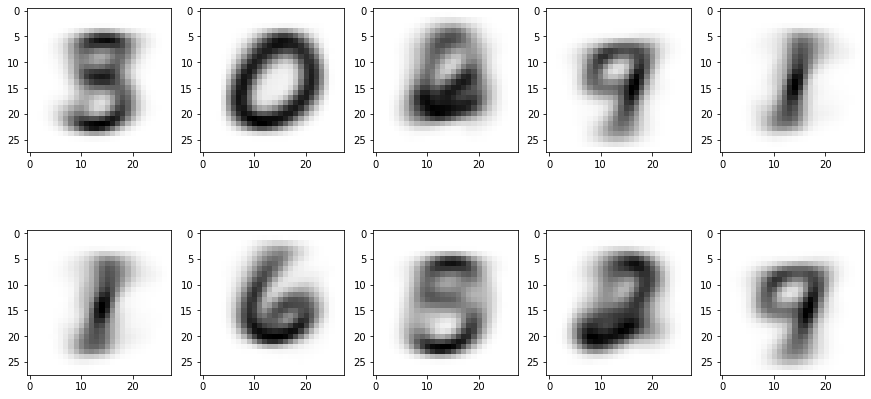

In [214]:
K=5
maxcentroid = finalcentroids[maxindex]
mincentroid = finalcentroids[minindex]
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(K):
    fig.add_subplot(1,5, 1+i)
    plt.imshow(maxcentroid[i].reshape(28,28),cmap='binary')
    fig.add_subplot(2,5, 1+i)
    plt.imshow(mincentroid[i].reshape(28,28),cmap='binary')

## Discussion of Results:
The majority of the centroids are quite distinguishable. With only 1 or 2 groups being blurry. This can have an affect on the classification accuracy later.

### Finding closest 10 data points:
Below is the code that creates the numpy array npmin10, which stores the distances of every data point to every centroid.

In [215]:
K = 5
min10 = []
finalmin10=[]
for i in range(len(data_test)):
    distances = []
    for j in range(K):
        distances.append(euclideandist(data_test[i],maxcentroid[j]))
    min10.append(distances)#10,000 nparrays of20
npmax10 = np.array(min10)

min10 = []
finalmin10=[]
for o in range(len(data_test)):
    distances = []
    for f in range(K):
        distances.append(euclideandist(data_test[o],mincentroid[f]))
    min10.append(distances)#10,000 nparrays of20
npmin10 = np.array(min10)

## Plotting the images, eyeballing digits (P=10, K=5)
Using argsort on the negation of npmin10 and npmax10, I return the indices of the 10 smallest distances for each cluster. (Since argsort returns the max value I had to negate the matrix). I then plot the corresponding datapoints in a 10X10 figure for both max and min jclust runs. Each row indicates the Kth cluster and should have similar features via Kmeans algorithm.

[2931 4971 6365 9882 7272 4818 2853  240 2549 2282]
[4542 5659 7289 6293 8127 4631 9519 6201 1723 8730]
[6966 9961 9334 2210 2458 1951 1578 1373 9269 9364]
[4901  471 5414 2544 9362 1401 3084 3098 2345 9448]
[3148 6618 6407 4859 1030 9291 2357 1876  835 6533]
[6618 3148 6407 9291 4859 1876 1030  835 3019 6623]
[2458 1373 6933 9312 6261 8831 3362 2759 5276 8779]
[4971  240 3917  395 3957 6624  153 5346 1967  890]
[4296 4189 4684 2981 2209 2662 2848 5823 6217 6607]
[4901  471 2544 5414 3247 9362 2345 8623 1401 3098]


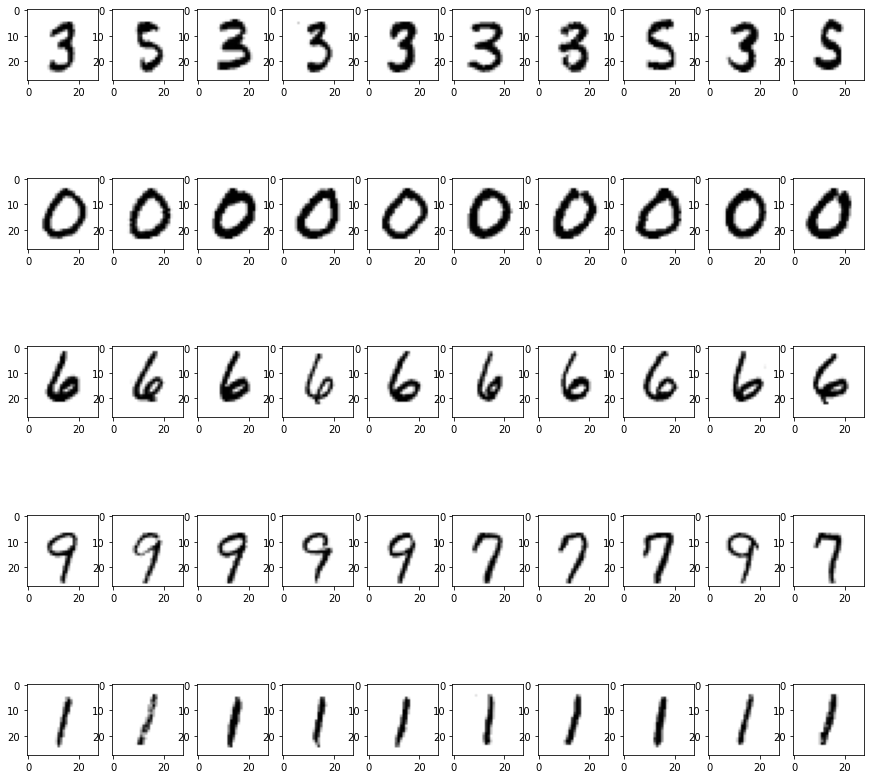

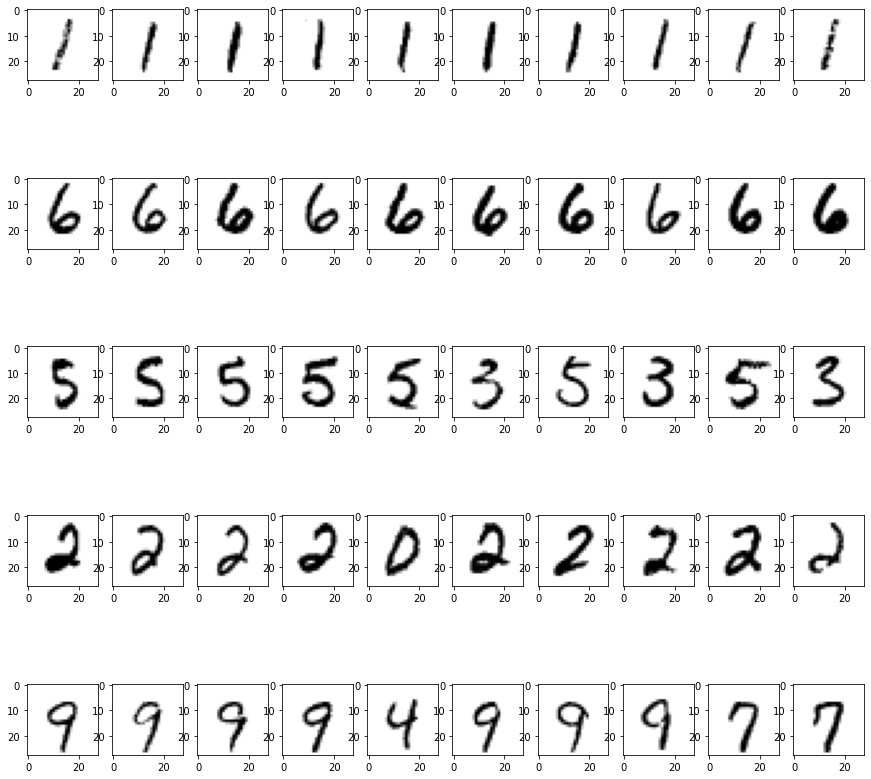

In [218]:
temp=[]
fig, axs = plt.subplots(5, 10, figsize=(15,15))
for i in range(5):
    a = (-npmin10[:,i]).argsort()[-10:][::-1]
    temp.append(a) #gives index of 10 closest pictures each cluster
    print(temp[i])
for i in range(5):
    for j in range(10):
         axs[i,j].imshow(data_test[temp[i][j],:].reshape(28,28),cmap='binary')
    #print(data_test_label)
    
temp=[]
fig, axs = plt.subplots(5, 10, figsize=(15,15))
for i in range(5):
    a = (-npmax10[:,i]).argsort()[-10:][::-1]
    temp.append(a) #gives index of 10 closest pictures each cluster
    print(temp[i])
for i in range(5):
    for j in range(10):
         axs[i,j].imshow(data_test[temp[i][j],:].reshape(28,28),cmap='binary')
    #print(data_test_label)

## Discussion of results:
For both the index and the image plots, the first 5 rows are for the minimum run and the last 5 rows are for the maximum run. Each row has 10 images corresponding to the 10 nearest datapoints. Comparing the the group representatives, I will generate a table below. 

## Generating max and min tables:

In [219]:
min_correct_table = np.zeros(5)
max_correct_table = np.zeros(5)
min_correct_table[0] = 7
min_correct_table[1] = 10
min_correct_table[2] = 10
min_correct_table[3] = 6
min_correct_table[4] = 10
max_correct_table[0] = 10
max_correct_table[1] = 10
max_correct_table[2] = 7
max_correct_table[3] = 9
max_correct_table[4] = 7

min_misclassified_table = 10 - min_correct_table
max_misclassified_table = 10 - max_correct_table
min_correct_table = min_correct_table.astype(int)
max_correct_table = max_correct_table.astype(int)
min_misclassified_table=min_misclassified_table.astype(int)
max_misclassified_table=max_misclassified_table.astype(int)
print("min:")
print(min_correct_table)
print(min_misclassified_table)
print("max:")
print(max_correct_table)
print(max_misclassified_table)

min:
[ 7 10 10  6 10]
[3 0 0 4 0]
max:
[10 10  7  9  7]
[0 0 3 1 3]


Eyeballing and verifying through the label produces the results as seen above. The 2 tables correspond to the max and min jclust runs and their correct and incorrect classifications for the 10 nearest data points. 

# Comparison of the performance of the supervised binary classifier from Least Squares and the unsupervised classifier from Kmeans:

While the least squares classifier requires the labels to be able to train the data, the Kmeans method only requires the data. By not knowing even how many different classes there are, kmeans will still group similar data together and form a prediction scheme. We do know that the correct number of classes is K = 10 as there are 10 hand written digits. 

Comparing the results of both classifiers, I believe the least squares classifier is more accurate as we can see from the low error rates computed. Kmeans classifier on the other hand can wrongly classified labels even for the 10 nearest datapoints. However, kmeans is powerful in the fact that it doesn't need a supervised amount of classes and is essentially "hands off". The more you iterate the data through the algorithm, the more solid the centroids become and hence more accurate. However, for a limited amount of data points or time, least sqaures is still more effective. 
